In [1]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from spacy.lang.es.stop_words import STOP_WORDS as es_stopwords
from wordcloud import WordCloud

c:\Users\froro\OneDrive\Escritorio\UNAL\RNA\FinancIA\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Configigurations
path = Path().cwd().parent/"Dataset"

In [3]:
# Functions
def plots_world_cloud(df, title, figsize=(10, 10)):
    """This function is used to plot the world cloud"""
    text = " ".join(df)
    plt.figure(figsize=figsize)
    wordcloud = WordCloud(background_color="white", stopwords=es_stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [4]:
df_train = pd.read_csv(path/"train.csv")
df_test = pd.read_csv(path/"test.csv")

df_train["len"] = df_train.text.apply(len)
df_train["tag"] = "train"
df_test["len"] = df_test.text.apply(len)
df_test["tag"] = "test"
df_train = df_test.copy()

In [7]:
df_train.head()

id                                               text   
0   3735  La actividad empresarial de la zona euro se co...  \
1   8216  La segunda ola del coronavirus desploma un 82%...   
2  13684  Xavier Labandeira: “España es uno de los paíse...   
3  20622  El bono americano ya deja pérdidas del 2,4% en...   
4  23052  Crece el temor ante una burbuja tecnológica y ...   

                  target target_sentiment companies_sentiment   
0  actividad empresarial         negative            negative  \
1            coronavirus         negative            negative   
2       cambio climático         negative            negative   
3         bono americano         negative            negative   
4    burbuja tecnológica         negative             neutral   

  consumers_sentiment  len   tag  
0            negative   99  test  
1            negative   86  test  
2            negative   84  test  
3            negative   53  test  
4             neutral   96  test

In [12]:
pd.get_dummies(df_train[["target_sentiment", "companies_sentiment", "consumers_sentiment"]], columns=["target_sentiment", "companies_sentiment", "consumers_sentiment"]).iloc[0].astype(int)

target_sentiment_negative       1
target_sentiment_neutral        0
target_sentiment_positive       0
companies_sentiment_negative    1
companies_sentiment_neutral     0
companies_sentiment_positive    0
consumers_sentiment_negative    1
consumers_sentiment_neutral     0
consumers_sentiment_positive    0
Name: 0, dtype: int32

In [24]:
df_train.target_sentiment = df_train.target_sentiment.str.replace("postive", "positive")
df_train.companies_sentiment = df_train.companies_sentiment.str.replace("postive", "positive")
df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace("positive", "positive")

df_train.consumers_sentiment = df_train.consumers_sentiment.str.replace("neutral?", "neutral")

# Análisis exploratorio para el train


<Axes: xlabel='target_sentiment'>

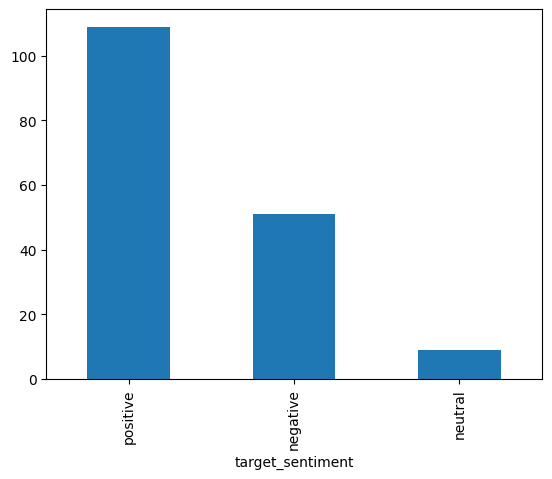

In [25]:
df_train.target_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='target_sentiment'>

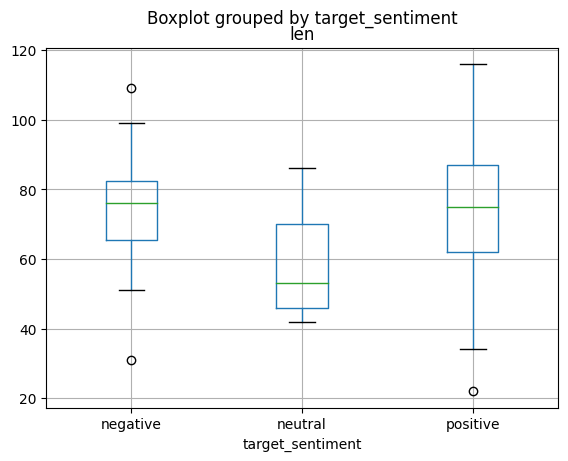

In [26]:
df_train.boxplot(column="len", by="target_sentiment")

In [27]:
df_train.groupby("target_sentiment").len.describe()

count       mean        std   min   25%   50%   75%    max
target_sentiment                                                            
negative           51.0  73.549020  14.571635  31.0  65.5  76.0  82.5  109.0
neutral             9.0  59.333333  15.716234  42.0  46.0  53.0  70.0   86.0
positive          109.0  74.128440  18.583197  22.0  62.0  75.0  87.0  116.0

In [28]:
df_train.companies_sentiment.value_counts().plot(kind="bar")

<Axes: xlabel='companies_sentiment'>

In [29]:
df_train.groupby("companies_sentiment").len.describe()

count       mean        std   min   25%   50%   75%   
companies_sentiment                                                        
negative              49.0  76.857143  17.002451  48.0  65.0  76.0  90.0  \
neutral               81.0  70.938272  18.345535  31.0  57.0  71.0  83.0   
positive              39.0  73.153846  16.099262  22.0  67.0  75.0  86.0   

                       max  
companies_sentiment         
negative             116.0  
neutral              113.0  
positive             102.0

<Axes: title={'center': 'len'}, xlabel='companies_sentiment'>

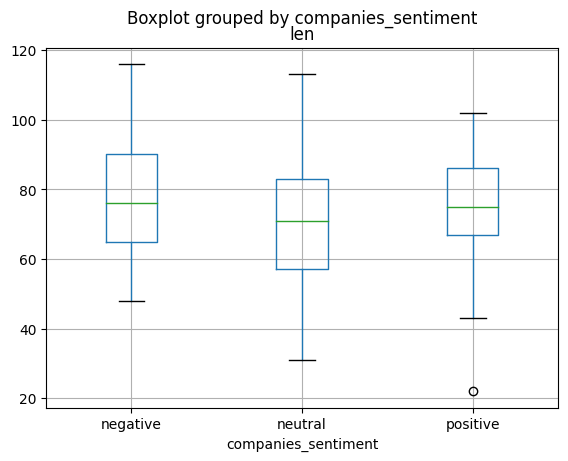

In [30]:
df_train.boxplot(column="len", by="companies_sentiment")

In [44]:
df_train.groupby("companies_sentiment").len.describe()

count       mean        std   min   25%   50%   75%   
companies_sentiment                                                        
negative              49.0  76.857143  17.002451  48.0  65.0  76.0  90.0  \
neutral               81.0  70.938272  18.345535  31.0  57.0  71.0  83.0   
positive              39.0  73.153846  16.099262  22.0  67.0  75.0  86.0   

                       max  
companies_sentiment         
negative             116.0  
neutral              113.0  
positive             102.0

<Axes: xlabel='consumers_sentiment'>

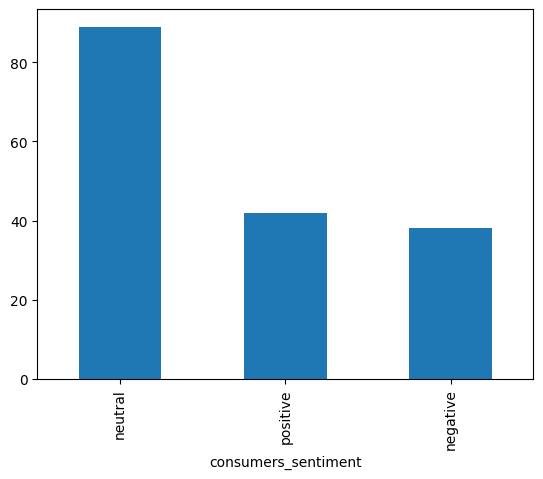

In [32]:
df_train.consumers_sentiment.value_counts().plot(kind="bar")

<Axes: title={'center': 'len'}, xlabel='consumers_sentiment'>

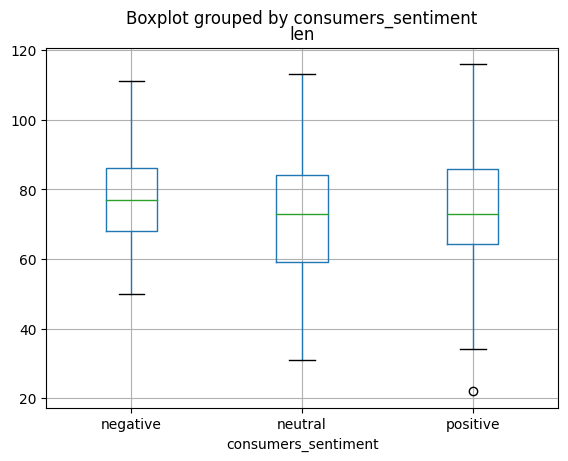

In [33]:
df_train.boxplot(column="len", by="consumers_sentiment")

## World Cloud

In [47]:
plots_world_cloud(df_train.text, "Word Cloud")

### Target Sentiment

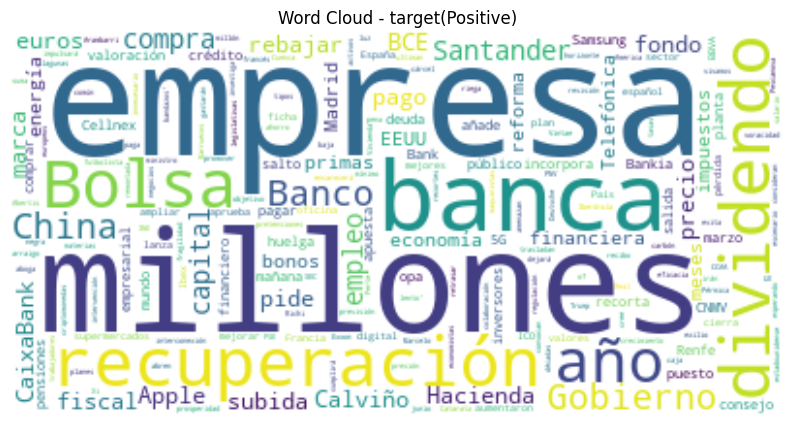

In [50]:
plots_world_cloud(df_train[df_train.target_sentiment == "positive"].text, "Word Cloud - target(Positive)")

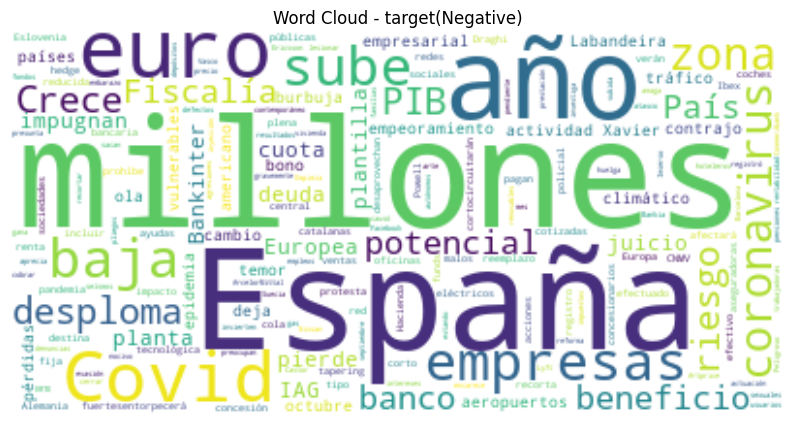

In [60]:
plots_world_cloud(df_train[df_train.target_sentiment == "negative"].text, "Word Cloud - target(Negative)")

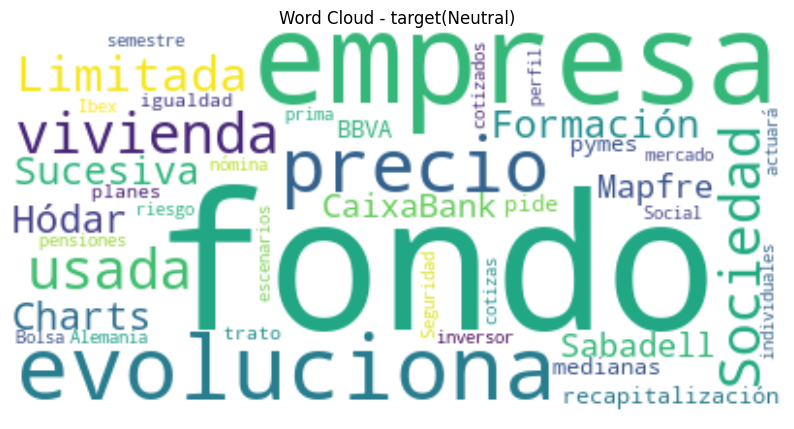

In [56]:
plots_world_cloud(df_train[df_train.target_sentiment == "neutral"].text, "Word Cloud - target(Neutral)")

### Companies Sentiment

In [57]:
plots_world_cloud(df_train[df_train.companies_sentiment == "positive"].text, "Word Cloud - companie(positive)")

In [58]:
plots_world_cloud(df_train[df_train.companies_sentiment == "negative"].text, "Word Cloud - companie(negative)")

In [61]:
plots_world_cloud(df_train[df_train.companies_sentiment == "neutral"].text, "Word Cloud - companie(neutro)")

### Consumer sentiment

In [62]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "positive"].text, "Word Cloud - consumers(positive)")

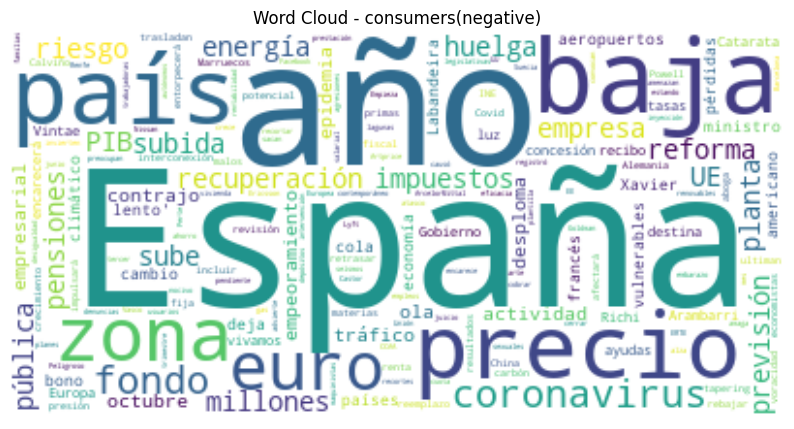

In [63]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "negative"].text, "Word Cloud - consumers(negative)")

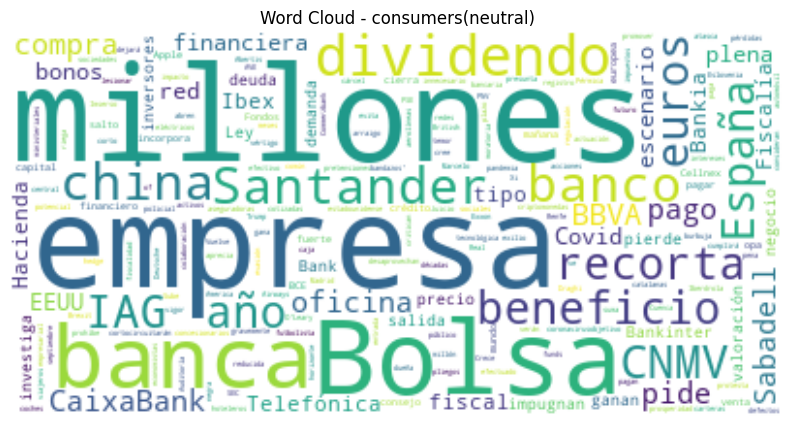

In [64]:
plots_world_cloud(df_train[df_train.consumers_sentiment == "neutral"].text, "Word Cloud - consumers(neutral)")

## Análisis con pysentimiento

In [16]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")
emotion_analyzer = create_analyzer(task="emotion", lang="es")
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [34]:
columns =['sentimient', 'sentimient_probas', 'emotion', 'emotion_prob', 'hateful',
       'targeted', 'aggressive']

In [35]:
def get_values(text):
    global analyzer, emotion_analyzer, hate_speech_analyzer
    sentiment = analyzer.predict(text)
    sentiment_tag = sentiment.output
    sentimient_probas = sentiment.probas[sentiment_tag]
    emotion = emotion_analyzer.predict(text)
    emotion_tag = emotion.output
    emotion_prob = emotion.probas[emotion_tag]
    hate_speech = hate_speech_analyzer.predict(text)
    info = {
        "sentimient": sentiment_tag, 
        "sentimient_probas": sentimient_probas,
        "emotion" : emotion_tag,
        "emotion_prob": emotion_prob,
        **hate_speech.probas}

    return info

In [36]:
df_train[columns] = df_train.text.apply(get_values).apply(pd.Series)
df_train.to_csv("df_with_sentiment.csv", index=False)